# 1.  Formulating our objective.
**AIM** to **classify the images of X-rays** to **identify** which show signs of **pneumonia**. It is a **binary classfication**.

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize']=(20,20)

2023-02-13 22:38:53.153636: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-13 22:38:53.153685: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# 2. Looking at our images.

**Pnuemonia X Ray Image**

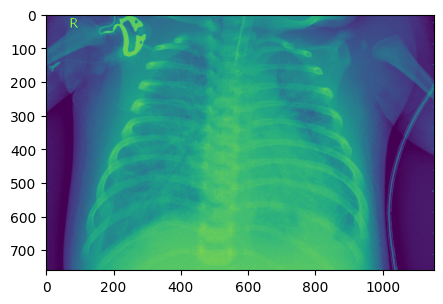

In [2]:
from glob import glob #retriving an array of files in directories
path_train = "/data/elastic-notebook/data/pneumonia/chest_xray/train"
img = glob(path_train+"/PNEUMONIA/*.jpeg")
# print(img)
img = np.asarray(plt.imread(img[0]))
plt.figure(figsize = (5 , 5))
plt.imshow(img)

**Normal X Ray Image**

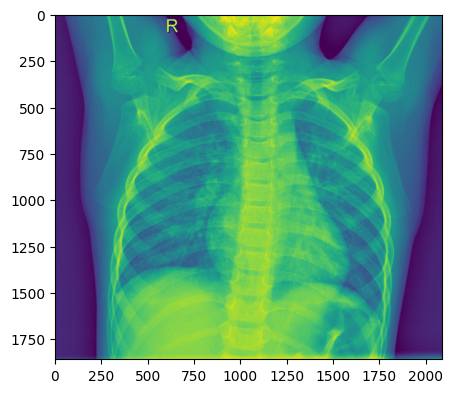

In [3]:
img = glob(path_train+"/NORMAL/*.jpeg")
img = np.asarray(plt.imread(img[0]))
plt.figure(figsize = (5 , 5))
plt.imshow(img)

# 3. Acquiring our dataset from the directories.

**Importing libraries that are used for creating a convolution neural network model.**

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array

In [5]:
from tensorflow.keras.models import Sequential,Model

In [6]:
from tensorflow.keras.layers import Conv2D,Dense,Flatten,Input,MaxPooling2D,Dropout,BatchNormalization

**Using Image Data Generator we load the images to our model.**

**What kind of data augmentation techniques will you use that are suitable for this problem ?**
* Horizontal Flip : a data augmentation technique that takes both rows and columns of such a matrix and flips. them horizontally. 
* Brightness Range : increases the overall lightness of the image.
* Height and Width Shift
* Rotation of the Image :we can rotate the image by 0 to 360 degrees clockwise.

In [7]:
img_size=150
batch_size=25

traingen=ImageDataGenerator(rescale=1/255.,
                           rotation_range=50,
                        brightness_range=[0.2,1.2],
                           width_shift_range=0.1,
                           height_shift_range=0.1,
                           horizontal_flip=True)


testgen=ImageDataGenerator(rescale=1/255.)

valgen=ImageDataGenerator(rescale=1/255.)

* **traindata** : stores all the images from the train directroy
* **testdata** : stores all the images from the test directory
* **valdata** : stores all the images from the val directory

In [8]:
traindata=traingen.flow_from_directory('/data/elastic-notebook/data/pneumonia/chest_xray/train',
                                       target_size=(img_size,img_size)
                                       ,batch_size=batch_size,
                                       shuffle=True,class_mode='binary'
                                      ,color_mode='grayscale')

testdata=testgen.flow_from_directory('/data/elastic-notebook/data/pneumonia/chest_xray/test',
                                    shuffle=False,batch_size=batch_size,
                                    target_size=(img_size,img_size),
                                    class_mode="binary",color_mode='grayscale')
valdata=valgen.flow_from_directory('/data/elastic-notebook/data/pneumonia/chest_xray/val',
                                    shuffle=False,batch_size=batch_size,
                                    target_size=(img_size,img_size),
                                    class_mode="binary",color_mode='grayscale')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


**Printing 15 images from the train data**

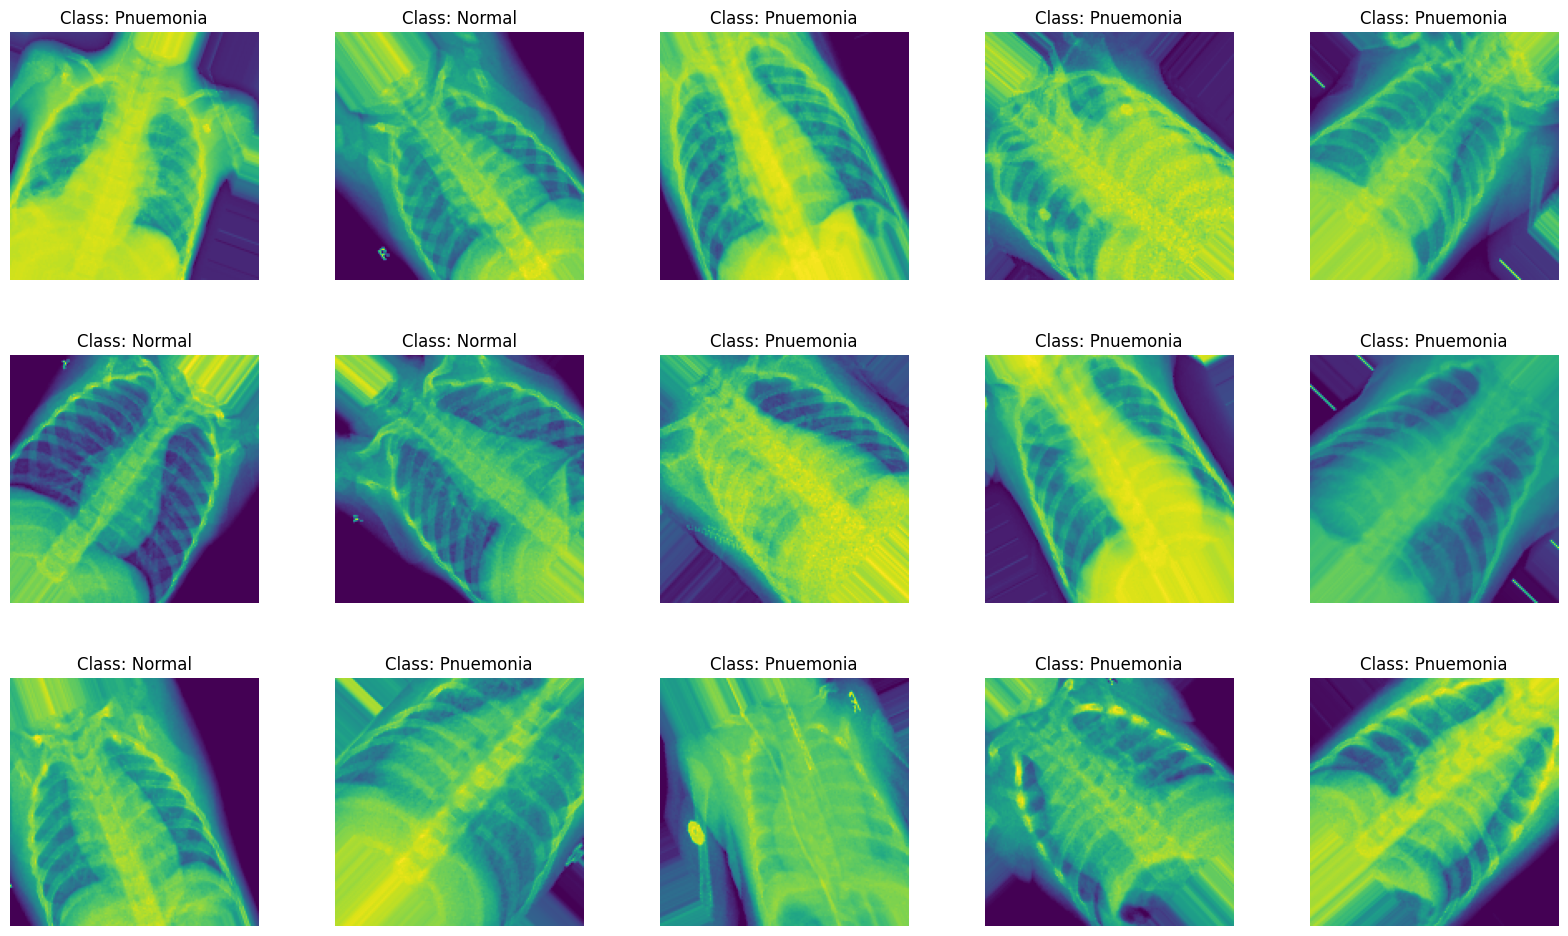

In [10]:
labels=['Normal','Pnuemonia']
samples=traindata.__next__()

images=samples[0]
target=samples[1]

for i in range(15):
    plt.subplot(5,5,i+1)
    plt.subplots_adjust(hspace=0.3,wspace=.3)
    plt.imshow(images[i])
    plt.title(f"Class: {labels[int(target[i])]}")
    plt.axis('off')

**Meta Data**

0 here is a label Normal and 1 is for Pnuemonia

In [11]:
df=pd.DataFrame(traindata.classes)
df.value_counts()

1    3875
0    1341
dtype: int64

In [12]:
df=pd.DataFrame(valdata.classes)
df.value_counts()

0    8
1    8
dtype: int64

In [13]:
df=pd.DataFrame(testdata.classes)
df.value_counts()

1    390
0    234
dtype: int64

# 4. Creating our Counvolution Neural Network.

In [14]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
model=Sequential()
model.add(Conv2D(32,(2,2),input_shape=(img_size,img_size,1),activation="relu",padding='same',strides=1))
model.add(MaxPooling2D())
model.add(Conv2D(64,(2,2),strides=2,activation="relu",padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(128,(2,2),strides=1,activation="relu",padding='same'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(1,activation='sigmoid'))


# input_layer = Input(shape=(img_size,img_size,1))
# x = Conv2D(64, (3,3), input_shape=(img_size,img_size,1), activation='relu', padding='same',strides=1)(input_layer)
# x = MaxPooling2D(2,2)(x)
# x = Conv2D(32, (3,3), activation='relu', padding='same',strides=1)(x)
# x = MaxPooling2D(2)(x)
# x = Conv2D(16, (3,3), activation='relu', padding='same',strides=1)(x)
# x = MaxPooling2D(2)(x)
# # x = Conv2D(256, (2,2), activation='relu', padding='same',strides=1)(x)
# # x = MaxPooling2D(2,2)(x)
# x = Flatten()(x)
# x = Dense(64, activation='relu')(x)
# output_layer = Dense(1, activation='sigmoid')(x)

# model = Model(inputs=input_layer,outputs=output_layer)

2023-02-13 22:38:57.114788: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-02-13 22:38:57.114827: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-02-13 22:38:57.114849: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (yongjoo-serv-01): /proc/driver/nvidia/version does not exist
2023-02-13 22:38:57.115062: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 38, 38, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 19, 19, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 19, 19, 128)       32896     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 9, 9, 128)        0

In [16]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

* **ModelCheckpoint** callback is used in conjunction with training using model. fit() to save a model or weights in a checkpoint file at some time, so the model or weights can be loaded later to continue the training from the state saved.
* **Early stopping** is a method that allows you to specify an arbitrary large number of training epochs and stop training once the model performance stops improving on a hold out validation dataset


In [17]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
filepath= "model_cnn.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False)
# es = EarlyStopping(monitor='accuracy', patience=5)

# 5. Training Our Convolution Neural Network.

In [18]:
history=model.fit(traindata,validation_data=valdata,epochs=15,callbacks=[checkpoint])

Epoch 1/15
209/209 [==============================] - ETA: 0s - loss: 0.4765 - accuracy: 0.7696
Epoch 1: val_loss improved from inf to 0.91961, saving model to model_cnn.h5
209/209 [==============================] - 30s 140ms/step - loss: 0.4765 - accuracy: 0.7696 - val_loss: 0.9196 - val_accuracy: 0.6875
Epoch 2/15
209/209 [==============================] - ETA: 0s - loss: 0.3216 - accuracy: 0.8530
Epoch 2: val_loss improved from 0.91961 to 0.84245, saving model to model_cnn.h5
209/209 [==============================] - 29s 139ms/step - loss: 0.3216 - accuracy: 0.8530 - val_loss: 0.8424 - val_accuracy: 0.6875
Epoch 3/15
209/209 [==============================] - ETA: 0s - loss: 0.2637 - accuracy: 0.8882
Epoch 3: val_loss improved from 0.84245 to 0.54287, saving model to model_cnn.h5
209/209 [==============================] - 29s 138ms/step - loss: 0.2637 - accuracy: 0.8882 - val_loss: 0.5429 - val_accuracy: 0.8750
Epoch 4/15
209/209 [==============================] - ETA: 0s - loss: 0

**Plotting Lossand and Accuracy Curves from training and validation**

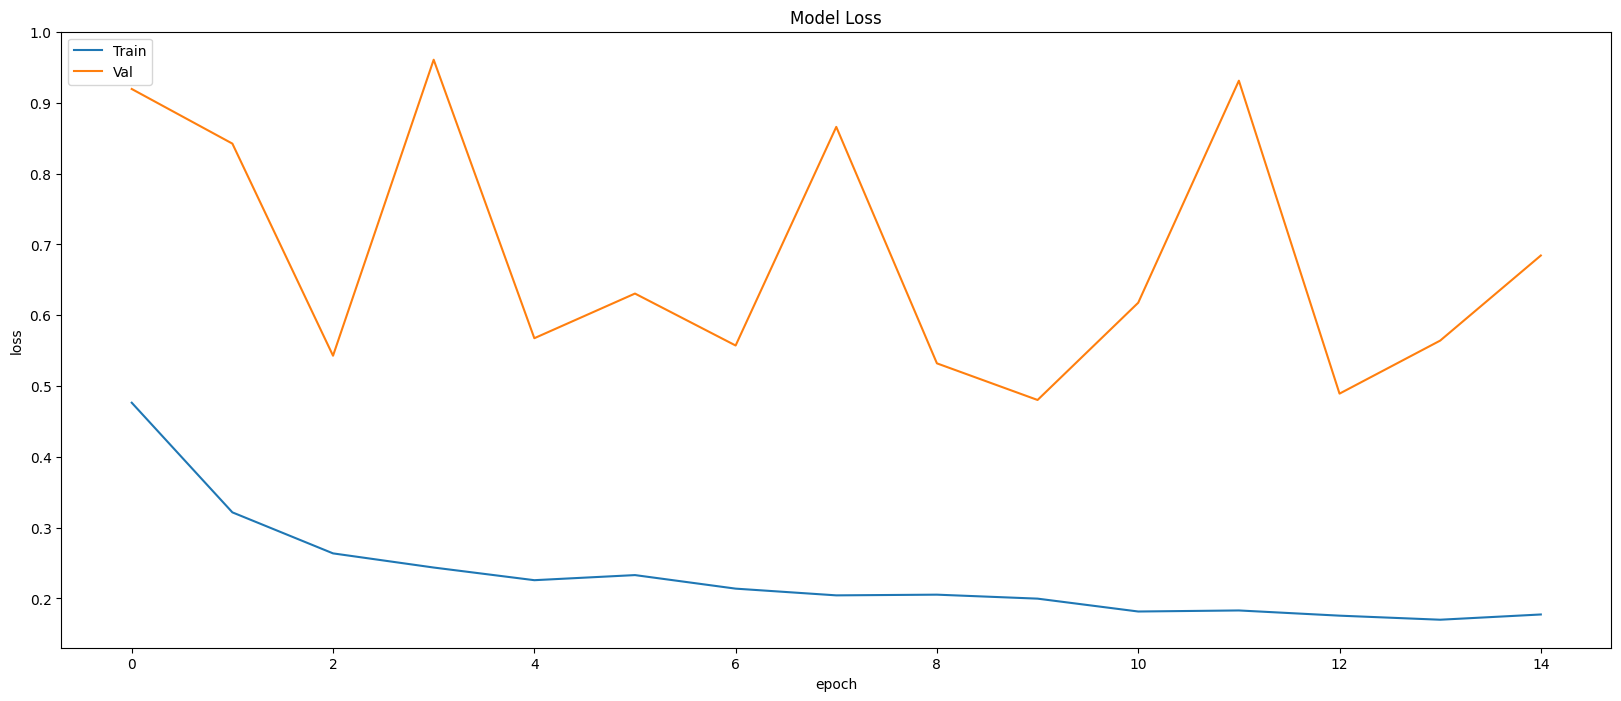

In [19]:
plt.figure(figsize=(20,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

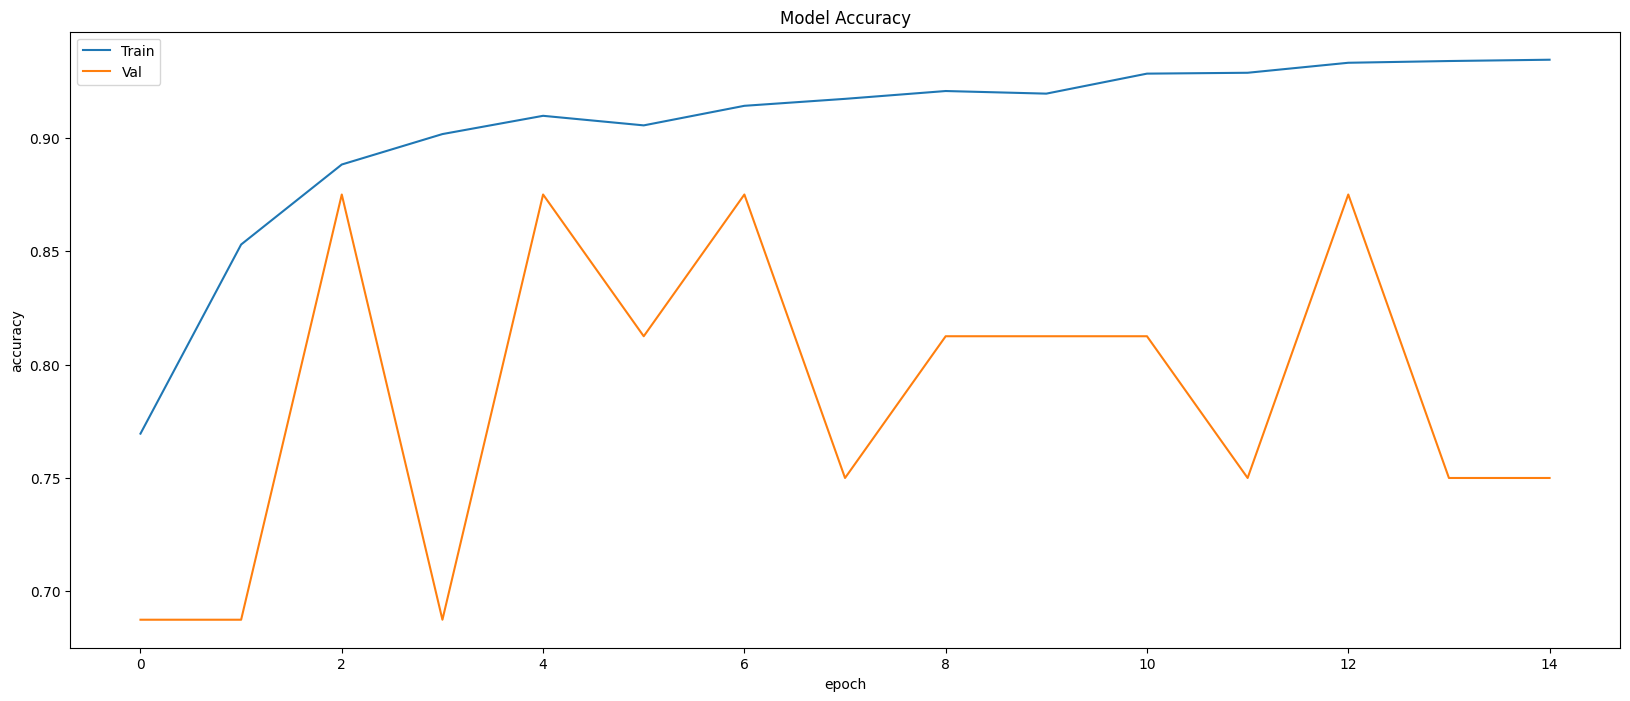

In [20]:
plt.figure(figsize=(20,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

## Checking the model prediction for the val data

In [21]:
y_test = valdata.classes
y_pred = model.predict(valdata)
y_pred_probs = y_pred.copy()
y_pred[y_pred>0.5] = 1
y_pred[y_pred<0.5] = 0

In [22]:
from sklearn.metrics import classification_report, confusion_matrix

**Classification Report**

In [23]:
print(classification_report(y_test,y_pred,target_names = ['Normal','Pnuemonia']))

              precision    recall  f1-score   support

      Normal       1.00      0.50      0.67         8
   Pnuemonia       0.67      1.00      0.80         8

    accuracy                           0.75        16
   macro avg       0.83      0.75      0.73        16
weighted avg       0.83      0.75      0.73        16



**Confusion Matrix**

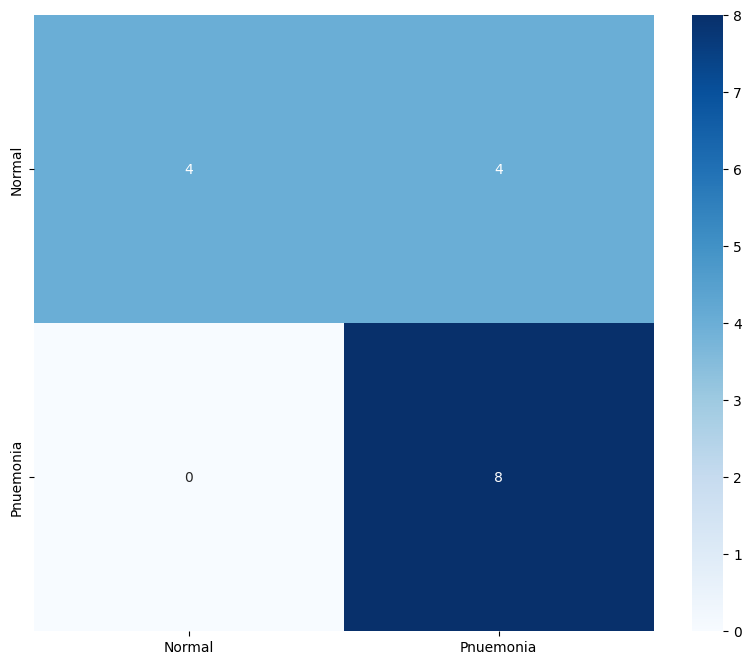

In [24]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='.3g',xticklabels=['Normal','Pnuemonia'],
            yticklabels=['Normal','Pnuemonia'],cmap='Blues')
plt.show()

## Checking the model prediction for the test data

In [25]:
y_test = testdata.classes
y_pred = model.predict(testdata)
y_pred_probs = y_pred.copy()

In [26]:
y_pred[y_pred>0.5] = 1
y_pred[y_pred<0.5] = 0

In [27]:
from sklearn.metrics import classification_report, confusion_matrix

**Classification Report**

In [28]:
print(classification_report(y_test,y_pred,target_names = ['Normal','Pnuemonia']))

              precision    recall  f1-score   support

      Normal       0.96      0.53      0.68       234
   Pnuemonia       0.78      0.99      0.87       390

    accuracy                           0.82       624
   macro avg       0.87      0.76      0.78       624
weighted avg       0.85      0.82      0.80       624



**Confusion Matrix**

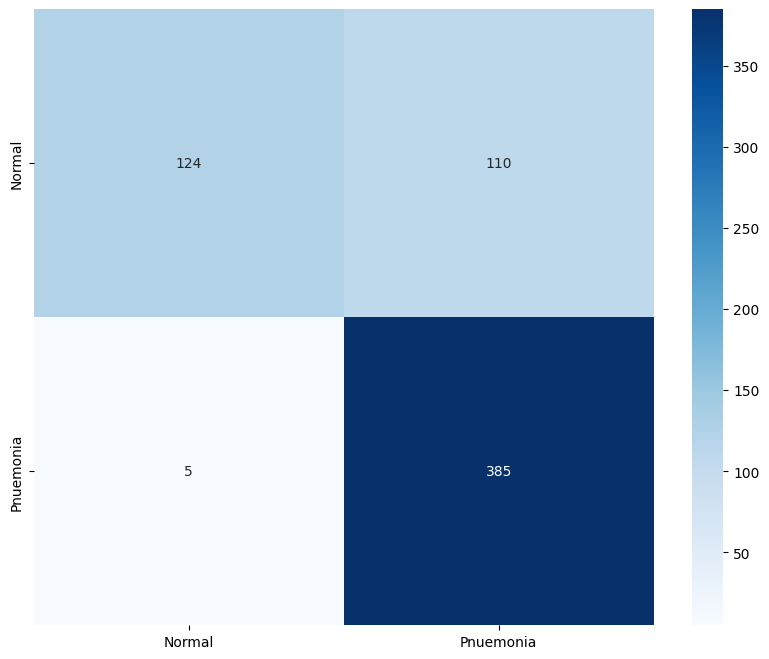

In [29]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='.3g',xticklabels=['Normal','Pnuemonia'],
            yticklabels=['Normal','Pnuemonia'],cmap='Blues')
plt.show()

# 6. Concluing through model experiments

**Model Diagnosis**
* Indentifying images that are misclassified for the test data

In [30]:
filenames = testdata.filenames
data = pd.DataFrame()
data['filename'] = filenames
data['actual_class'] = y_test
data['predicted_class'] = y_pred
data['predicted_prob'] = y_pred_probs

In [31]:
misclassification = data[data['actual_class']!=data['predicted_class']]

**The below dataframe shows us that the files that was predicted wrong in testing data. The reason for the following are listed below:**
* could have happed due to some clarity issue
* the label for the image could be wrong

**Which images are getting misclassified and with how much probability ?**
* all the files listed below are being misclassified

In [32]:
misclassification[(misclassification['actual_class']==0) & (misclassification['predicted_prob']>0.9)]

,filename,actual_class,predicted_class,predicted_prob
1,NORMAL/IM-0003-0001.jpeg,0,1.0,0.906755
3,NORMAL/IM-0006-0001.jpeg,0,1.0,0.954961
16,NORMAL/IM-0022-0001.jpeg,0,1.0,0.902156
20,NORMAL/IM-0028-0001.jpeg,0,1.0,0.981067
26,NORMAL/IM-0033-0001.jpeg,0,1.0,0.983432
40,NORMAL/IM-0065-0001.jpeg,0,1.0,0.977011
47,NORMAL/IM-0077-0001.jpeg,0,1.0,0.993477
49,NORMAL/IM-0081-0001.jpeg,0,1.0,0.964825
52,NORMAL/IM-0085-0001.jpeg,0,1.0,0.963547
61,NORMAL/IM-0101-0001.jpeg,0,1.0,0.989987


In [33]:
misclassification[(misclassification['actual_class']==1) & (misclassification['predicted_prob']<0.5)]

,filename,actual_class,predicted_class,predicted_prob
388,PNEUMONIA/person152_bacteria_724.jpeg,1,0.0,0.385355
390,PNEUMONIA/person153_bacteria_726.jpeg,1,0.0,0.224667
479,PNEUMONIA/person173_bacteria_831.jpeg,1,0.0,0.368013
496,PNEUMONIA/person21_virus_53.jpeg,1,0.0,0.253814
602,PNEUMONIA/person8_virus_28.jpeg,1,0.0,0.297795


**Displaying Missclassified Image**

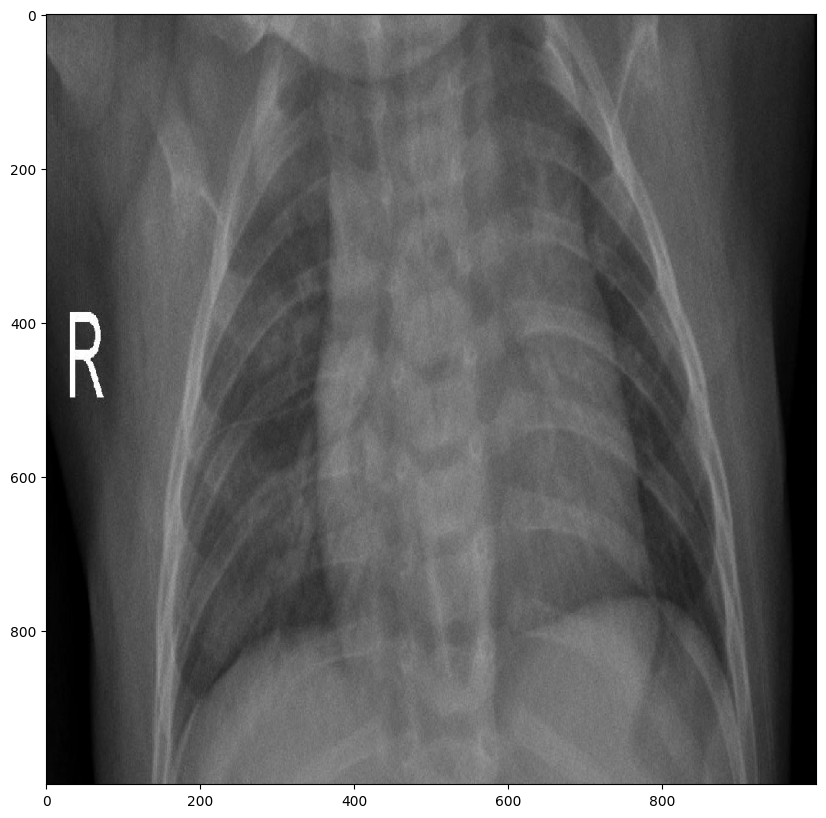

In [34]:
img = load_img('/data/elastic-notebook/data/pneumonia/chest_xray/test/NORMAL/IM-0022-0001.jpeg',target_size=(1000,1000))
img = img_to_array(img)/255.
plt.figure(figsize = (10 , 10))
plt.imshow(img)

**Feature Map Visualizations**

In [35]:
img = np.expand_dims(img,axis=0)
img.shape

(1, 1000, 1000, 3)

In [36]:
model.layers

In [37]:
feature_extractor = Model(model.inputs,model.layers[1].output)

In [38]:
features = feature_extractor.predict(valdata)
features.shape

(16, 75, 75, 32)

**Gives You the top 15 feratures learnt from the last second layer.**

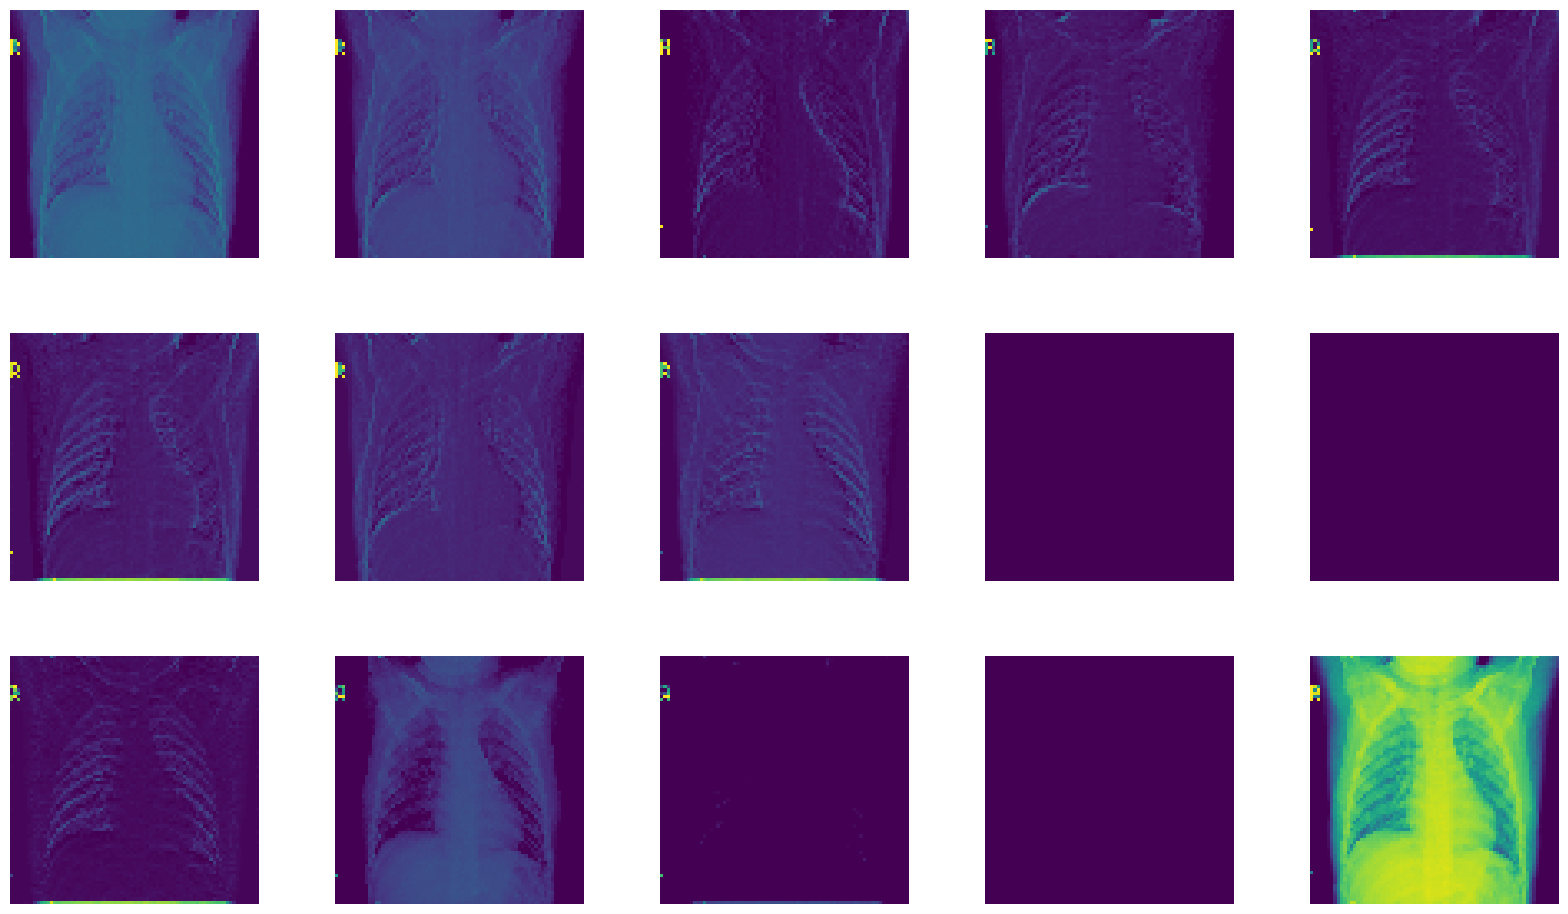

In [39]:
plt.figure(figsize = (20 , 20))
for i in range(15):
    plt.subplot(5 , 5, i+1)
    plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
    plt.imshow(features[0,:,:,i])
    plt.axis('off')

In [40]:
feature_extractor_last = Model(model.inputs,model.layers[-2].output)
features = feature_extractor_last.predict(valdata)
features.shape

(16, 128)

**What do you think would be a bigger problem ?**
* The model misclassifying that a person does not have Pneumonia when in reality he has Pneumonia. (Actual: Pneumonia, Predicted: No Pneumonia). This would give the patient false hope. What if he or she decides not to get get tested, he or she would never get to know that they have Pneumonia. Hence this is the bigger problem.

* The model misclassifying that a person has Pneumonia when in reality  he doesn’t. It would not be of an issue cause if gets a proper test or takes guidance from the doctor he would find out that he does not have Pneumonia.

**What kind of classification metric would you use to assess the above determined issue ?**
* Recall metric should be used to asses the above determined issue. 
* Recall score represents the model’s ability to correctly predict the positives out of actual positives. 
* This is unlike precision which measures how many predictions made by models are actually positive out of all positive predictions made.

**How much is the separability between the non-pneumonia and pneumonia X-ray images?**
* As per the f1 score ( mean of precision and recall ). if we consider f1 score for pneumonia, it is 89% which means our model is working well for classifying pneumonia.